In [99]:
# Importing Libraries
import pandas as pd
import numpy as np
import math as mt
import scipy.stats as ss  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
%autosave 5

Autosaving every 5 seconds


In [2]:
# Loading the dataset
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.shape

(29685, 25)

Dataset Contains 29685 samples in 25 columns.

In [4]:
COL = df.columns.tolist()
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

# Univariate Analysis

**ID column**

ID is the unique column in our dataset.

In [5]:
df.ID.nunique() == df.shape[0]

True

**Target Variable**

'default payment next month' is the target variable

In [6]:
TARGET = 'default payment next month'

In [8]:
df['default payment next month'].value_counts()

0    23123
1     6562
Name: default payment next month, dtype: int64

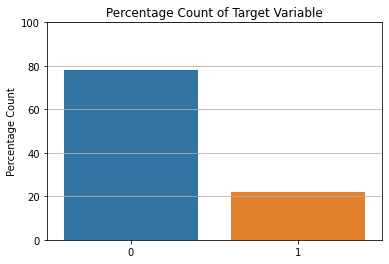

In [27]:
t = df['default payment next month'].value_counts(normalize=True)*100
plt.figure()
sns.barplot(x=t.index,y=t)
plt.grid(axis='y')
plt.ylabel('Percentage Count')
plt.title('Percentage Count of Target Variable')
plt.ylim(0,100)
plt.show()

- We can see class imbalance in our target variable. Therefore we need to use stratified sampling while performing cross validation.

**LIMIT_BAL**  
Amount of the credit provided

In [10]:
df['LIMIT_BAL'].describe()

count      29685.000000
mean      167519.948796
std       129716.478534
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

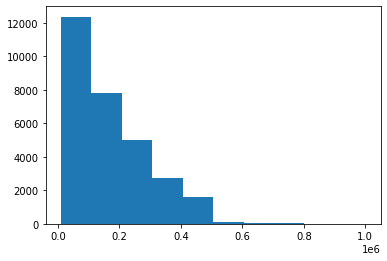

In [11]:
df['LIMIT_BAL'].hist()
plt.grid(False)
plt.show()

- Since the data is skewed, we will use IQR method to remove outliers and visualise the data

In [12]:
IQR = ss.iqr(df['LIMIT_BAL'])
Q3 = np.quantile(df['LIMIT_BAL'],0.75)
print(Q3,IQR)

240000.0 190000.0


In [13]:
UL = Q3+(IQR*1.5)
print(UL)

525000.0


In [14]:
df.shape[0] - df[['LIMIT_BAL']].query('LIMIT_BAL <= @UL').shape[0]

166

- 166 outliers are present in the LIMIT_BAL variable

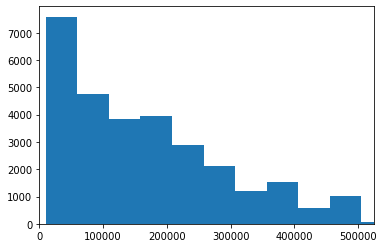

In [15]:
df['LIMIT_BAL'].hist(bins=20)
plt.grid(False)
plt.xlim(0,UL)
plt.show()

**SEX**  
Gender (1 = male; 2 = female)

In [28]:
# Function to plot percentage count
def per_count(series,categories):
    t = series.value_counts(normalize=True,sort=False)*100
    t.index = categories
    fig,ax = plt.subplots(figsize=(6,4))
    sns.barplot(x=t.index,y=t)
    plt.title('Percentage Count plot of '+series.name)
    plt.ylim(0,100)
    plt.show()

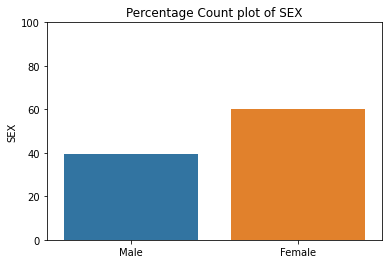

In [29]:
per_count(df['SEX'],['Male','Female'])

- Female customers are 20% more than of male customer

**EDUCATION**  
Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

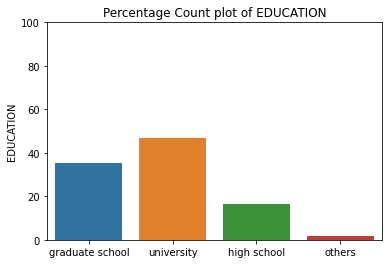

In [30]:
per_count(df['EDUCATION'],['graduate school','university','high school','others'])

**MARRIAGE**  
Marital status (1 = married; 2 = single; 3 = others)

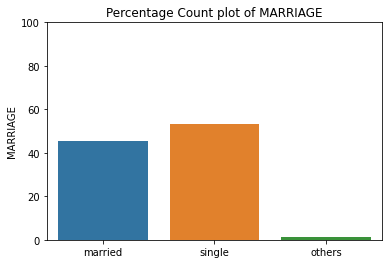

In [31]:
per_count(df['MARRIAGE'],['married','single','others'])

**AGE**

In [20]:
df['AGE'].describe()

count    29685.000000
mean        35.481354
std          9.212199
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

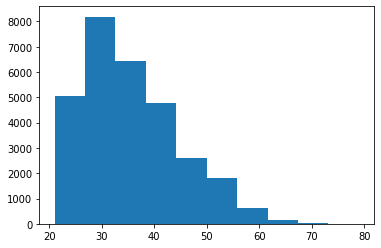

In [21]:
df['AGE'].hist()
plt.grid(False)
plt.show()

In [22]:
IQR = ss.iqr(df['AGE'])
Q3 = np.quantile(df['AGE'],0.75)
print(Q3,IQR)
UL = Q3+(IQR*1.5)
print(UL)
print('Outliers ',df.shape[0] - df[['AGE']].query('AGE <= @UL').shape[0])

41.0 13.0
60.5
Outliers  269


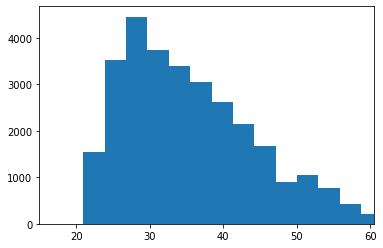

In [23]:
df['AGE'].hist(bins=20)
plt.grid(False)
plt.xlim(15,UL)
plt.show()

**'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6'**  
 Past month Payment status  
 
1 = payment delay for one month; 2 = payment delay for two months; etc ; 9 = payment delay for nine months and above.  
0 and negative values represent pay duly and in advance

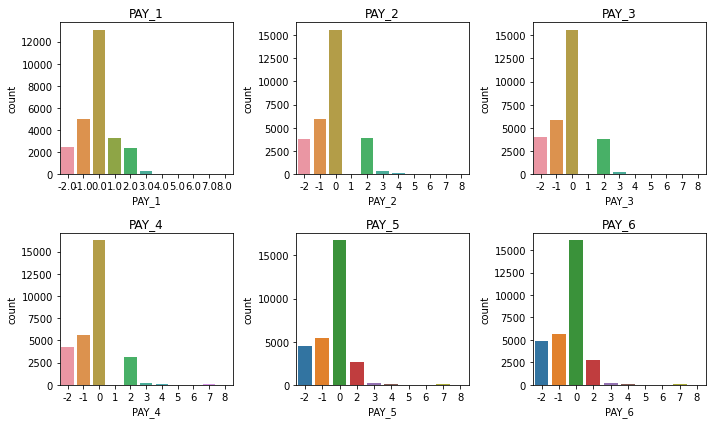

In [24]:
PAY = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(10,6))
a = [ax1,ax2,ax3,ax4,ax5,ax6]
for i in range(len(PAY)):
    sns.countplot(x=df[PAY[i]],ax=a[i])
    a[i].set_title(PAY[i])
plt.tight_layout()
plt.show()

**'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6'**  
 Bill statement amount for previous months

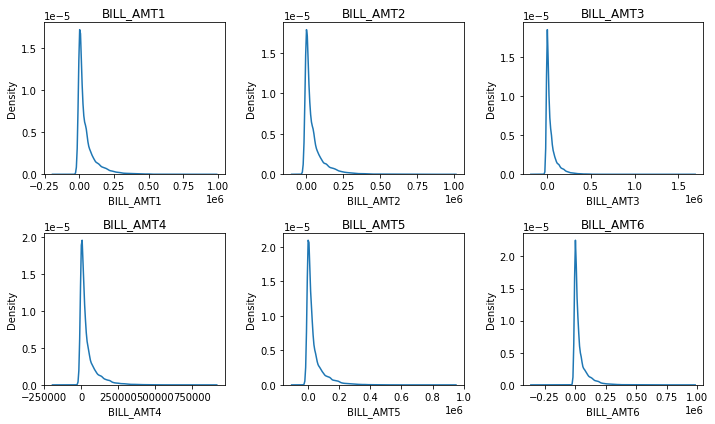

In [25]:
BILL = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(10,6))
a = [ax1,ax2,ax3,ax4,ax5,ax6]
for i in range(len(BILL)):
    sns.kdeplot(x=df[BILL[i]],ax=a[i])
    a[i].set_title(BILL[i])
plt.tight_layout()
plt.show()

**'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6'**  
 Amount of previous payment

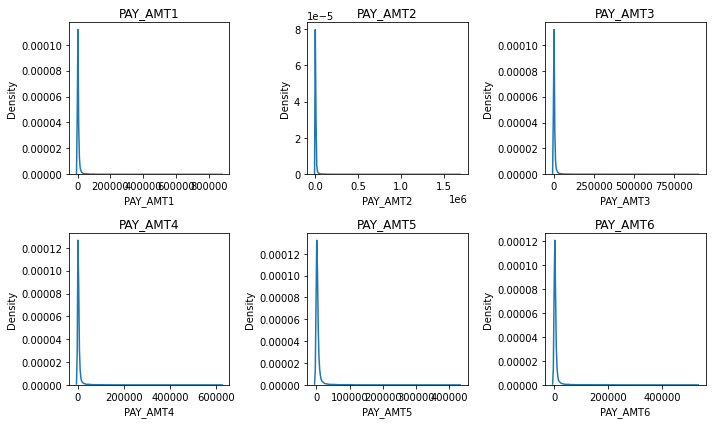

In [26]:
PAY = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(10,6))
a = [ax1,ax2,ax3,ax4,ax5,ax6]
for i in range(len(PAY)):
    sns.kdeplot(x=df[PAY[i]],ax=a[i])
    a[i].set_title(PAY[i])
plt.tight_layout()
plt.show()

## Observations From Univariate Analysis  
- ID column is unique for each observation  
- Target variable is categorical with value 0 and 1  
- Target variable classes are imbalanced(80-20 %) with 0 being the majority class. Therefore stratified random sampling is preferred during cross validation.   
- LIMIT_BAL column has 166 outliers(IQR method) with $Q_3 + (1.5*IQR) = 525000$  
- Female and Male customers has a percentage count of 60 and 40.  
- More than 80% customers have University or Graduate school education.  
- Count of married and single customers are arround 50% each with single as the class with highest count.  
- AGE column has 269 outliers(IQR method) with $Q_3 + (1.5*IQR) = 60.5$  
- 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6' columns are categorical indicating payment delay in months as integer values.  
-  BILL_AMT1-6 and PAY_AMT1-6 are numerical variables which have high skweness. Transfomations have to be applied before modelling.

# Bivariate Analysis

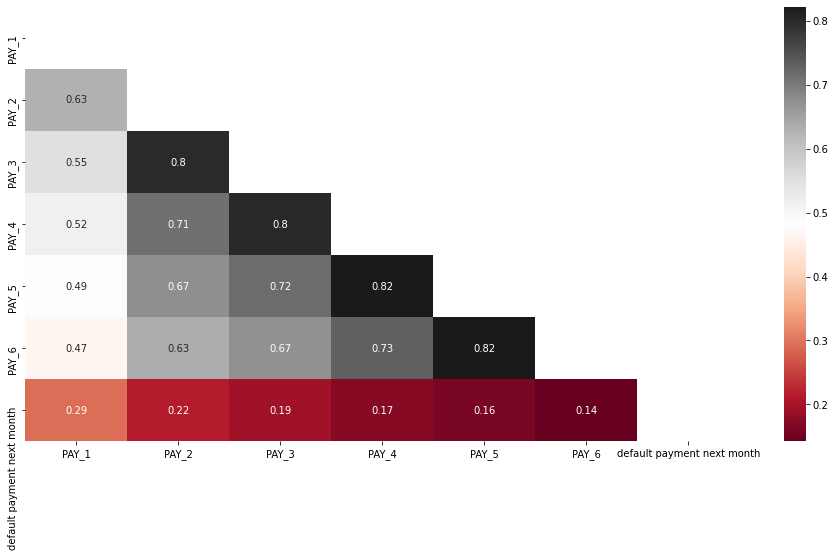

In [35]:
a = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',TARGET]
plt.figure(figsize=(16,8))
sns.heatmap(df[a].corr(method='spearman'),cmap='RdGy',annot=True,mask=np.triu(np.ones(len(a))))
plt.show()

**Correlation between TARGET and numeric coloumns**

In [36]:
from scipy.stats import pointbiserialr
def pbr(x,y):
    a = pointbiserialr(x,y)[0]
    return a

In [41]:
a = ['AGE','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',TARGET]
t = df[a].corrwith(df[TARGET],method=pbr)
t

AGE                           0.013698
PAY_AMT1                     -0.072942
PAY_AMT2                     -0.058103
PAY_AMT3                     -0.055772
PAY_AMT4                     -0.056620
PAY_AMT5                     -0.054880
PAY_AMT6                     -0.052860
BILL_AMT1                    -0.019692
BILL_AMT2                    -0.014519
BILL_AMT3                    -0.014272
BILL_AMT4                    -0.010236
BILL_AMT5                    -0.006687
BILL_AMT6                    -0.005561
default payment next month    1.000000
dtype: float64

**Default Rates**

**SEX and Target variable**

In [149]:
df.groupby('SEX')[[TARGET]].mean()*100

,default payment next month
SEX,
1,24.161359
2,20.753769


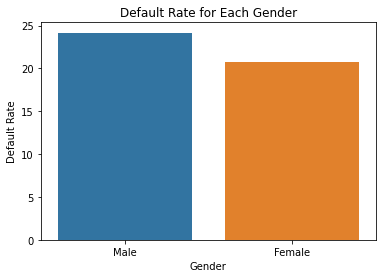

In [151]:
t = df.groupby('SEX')[TARGET].mean()*100
t.name = 'Default Rate'
t.index = ['Male','Female']
sns.barplot(x=t.index,y=t)
plt.xlabel('Gender')
plt.title('Default Rate for Each Gender')
plt.show()

**EDUCATION and Target variable**

Default rate for each categories of EDUCATION

In [142]:
df.groupby('EDUCATION')[[TARGET]].mean()*100

,default payment next month
EDUCATION,
1,19.238113
2,23.681936
3,25.190055
4,7.173913


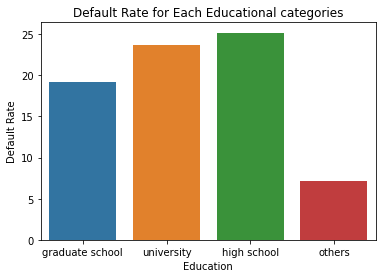

In [148]:
t = df.groupby('EDUCATION')[TARGET].mean()*100
t.name = 'Default Rate'
t.index = ['graduate school','university','high school','others']
sns.barplot(x=t.index,y=t)
plt.xlabel('Education')
plt.title('Default Rate for Each Educational categories')
plt.show()

**MARRIAGE and Target variable**

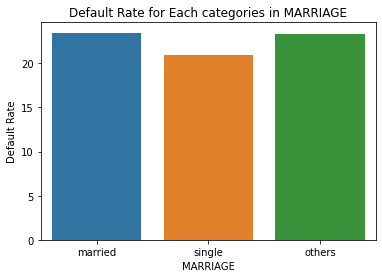

In [153]:
t = df.groupby('MARRIAGE')[TARGET].mean()*100
t.name = 'Default Rate'
t.index = ['married','single','others']
sns.barplot(x=t.index,y=t)
plt.xlabel('MARRIAGE')
plt.title('Default Rate for Each categories in MARRIAGE')
plt.show()

**There is no linear trend in categories of SEX,EDUCATION or MARRIAGE. Therfore linear models won't be able to make use of these categorical variables effectively for prediction.**

**For linear models we can one hot encode the variable and use it.**

### Data Trnsforamtion

In [82]:
cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
df[cols].skew()

PAY_AMT1     14.664234
PAY_AMT2     30.495617
PAY_AMT3     17.238959
PAY_AMT4     12.868859
PAY_AMT5     11.132480
PAY_AMT6     10.653476
BILL_AMT1     2.663227
BILL_AMT2     2.704198
BILL_AMT3     3.090734
BILL_AMT4     2.822660
BILL_AMT5     2.877416
BILL_AMT6     2.848194
dtype: float64

In [116]:
# scaler = MinMaxScaler(feature_range=(0.0001, 1))
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
power = PowerTransformer(method='yeo-johnson')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data_num = df[cols]
data = pipeline.fit_transform(data_num)
dic = {}
for i in range(12):
    dic[i] = cols[i]
data_trans = pd.DataFrame(data).rename(columns=dic)
data_trans.skew()

PAY_AMT1     0.180143
PAY_AMT2     0.206248
PAY_AMT3     0.275819
PAY_AMT4     0.308019
PAY_AMT5     0.305362
PAY_AMT6     0.330206
BILL_AMT1   -0.956499
BILL_AMT2    0.238527
BILL_AMT3   -0.866810
BILL_AMT4   -1.609863
BILL_AMT5    0.101195
BILL_AMT6   -5.699360
dtype: float64

In [117]:
data_trans.min(),data_trans.quantile(0.01)

(PAY_AMT1     -1.417820
 PAY_AMT2     -1.392212
 PAY_AMT3     -1.297122
 PAY_AMT4     -1.243294
 PAY_AMT5     -1.236694
 PAY_AMT6     -1.207130
 BILL_AMT1   -28.899761
 BILL_AMT2   -10.112789
 BILL_AMT3   -33.335921
 BILL_AMT4   -39.225860
 BILL_AMT5   -16.519293
 BILL_AMT6   -55.741313
 dtype: float64,
 PAY_AMT1    -1.417820
 PAY_AMT2    -1.392212
 PAY_AMT3    -1.297122
 PAY_AMT4    -1.243294
 PAY_AMT5    -1.236694
 PAY_AMT6    -1.207130
 BILL_AMT1   -1.141165
 BILL_AMT2   -1.211946
 BILL_AMT3   -1.150114
 BILL_AMT4   -1.116995
 BILL_AMT5   -1.171991
 BILL_AMT6   -0.896184
 Name: 0.01, dtype: float64)

- Outliers are present in BILL_AMT columns

In [118]:
PAY = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
d1 = pd.concat([data_trans,df[PAY]],axis=1)

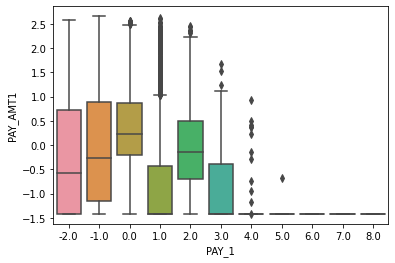

In [121]:
sns.boxplot(x='PAY_1',y='PAY_AMT1',data=d1)
plt.show()

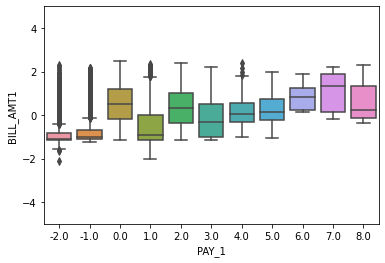

In [127]:
sns.boxplot(x='PAY_1',y='BILL_AMT1',data=d1)
plt.ylim(-5,5)
plt.show()